# Time Series Analysis & Forecasting- Project

__Problem Statement:__
    
`Fit a seasonal ARIMA model of your choice to the U.S. Live Birth Series (birth).`

`Use the estimated model to forecast the next 12 months.`

Done by,
   - RAHINI (215229128)
   - KAUSALYA (215229118)
   - SHARON SAM (215229137)
   - DAYA ANANDHI (215229109)
   - ADELINE (215229146)

### Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA

### Reading the dataset from Webpage and Importing into dataframe

In [2]:
page = requests.get('https://www.infoplease.com/us/population/live-births-and-birth-rates-year')

bs4 = BeautifulSoup(page.content,'html.parser')

table = bs4.find("table", id="A0005068")

headers = []
for i in table.find_all("th"):
    title = i.text
    headers.append(title)

df = pd.DataFrame(columns = headers)

for j in table.find_all("tr")[1:]:
    row_data = j.find_all("td")
    row = [i.text for i in row_data]
    length = len(df)
    df.loc[length] = row

### Properties of dataset

In [3]:
df.head()

,Year,Births1,Rate2
0,1910,"2,777,000",30.1
1,1915,"2,965,000",29.5
2,1920,"2,950,000",27.7
3,1925,"2,909,000",25.1
4,1930,"2,618,000",21.3


In [4]:
df.tail()

,Year,Births1,Rate2
58,2002,"4,021,726",13.9
59,2003,"4,089,950",14.1
60,2004,"4,112,052",14.0
61,2005,"4,138,349",14.0
62,2009,"4,131,019",13.8


In [5]:
df.shape

(63, 3)

In [6]:
df.size

189

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     63 non-null     object
 1   Births1  63 non-null     object
 2   Rate2    63 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


### Pre-processing

#### Dropping unwanted columns

In [8]:
df.drop('Births1', inplace=True, axis=1)

#### Changing the values as required

In [9]:
df.iloc[9,0] = '1952'
df.iloc[10,0] = '1953'
df.iloc[11,0] = '1954'
df.iloc[13,0] = '1956'
df.iloc[14,0] = '1957'
df.iloc[15,0] = '1958'
df.iloc[16,0] = '1959'
df.iloc[17,0] = '1960'
df.iloc[18,0] = '1961'
df.iloc[19,0] = '1962'
df.iloc[20,0] = '1963'
df.iloc[21,0] = '1964'
df.iloc[22,0] = '1965'
df.iloc[23,0] = '1966'
df.iloc[24,0] = '1967'
df.iloc[25,0] = '1968'
df.iloc[26,0] = '1969'
df.iloc[27,0] = '1970'
df.iloc[28,0] = '1971'

#### Converting datatype of the elements in dataset

In [10]:
df['Year'] = df['Year'].astype('int')
df['Rate2'] = df['Rate2'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    63 non-null     int32  
 1   Rate2   63 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.2 KB


### Setting Year as Index labels

In [12]:
df.set_index('Year',inplace=True)

### Renaming the column

In [13]:
df.rename(columns = {'Rate2':'Birth_Rate'}, inplace = True)

In [14]:
df.head()

,Birth_Rate
Year,
1910,30.1
1915,29.5
1920,27.7
1925,25.1
1930,21.3


### Plotting the Time Series

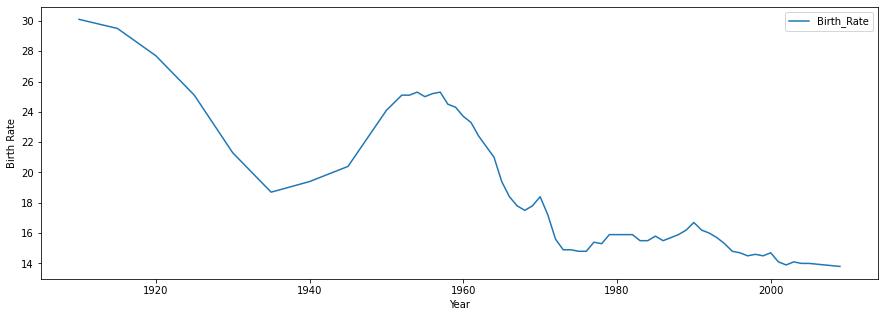

In [15]:
rcParams['figure.figsize'] = 15,5
df.plot()
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.show()

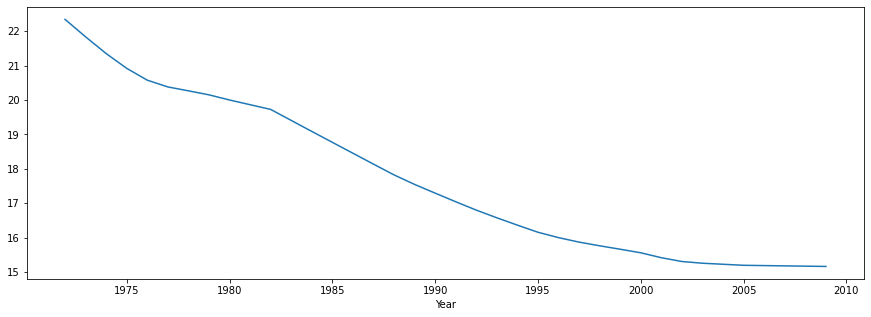

In [16]:
df.Birth_Rate.rolling(window=30).mean().plot()
plt.show()

### Checking for Stationarity

In [17]:
test_result = adfuller(df['Birth_Rate'])

In [18]:
def adfuller_test(br):
    test_result = adfuller(br)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value, label in zip(test_result,labels):
        print(label+' : '+str(value) )

if test_result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("Weak evidence against null hypothesis(Ho), indicating it is non-stationary ")

adfuller_test(df['Birth_Rate'])

Weak evidence against null hypothesis(Ho), indicating it is non-stationary 
ADF Test Statistic : -2.635845300334956
p-value : 0.08581273678851786
#Lags Used : 1
Number of Observations : 61


__Here P-value is 0.08 which is greater than 0.05, 
which means data is accepting the null hypothesis,
which means data is non-stationary.__

### Differencing to make the model as Stationary 

In [19]:
df['Difference'] = df['Birth_Rate'] - df['Birth_Rate'].shift()
df.head()

,Birth_Rate,Difference
Year,,
1910,30.1,NaN
1915,29.5,-0.6
1920,27.7,-1.8
1925,25.1,-2.6
1930,21.3,-3.8


#### Again testing if data is stationary

In [20]:
adfuller_test(df['Difference'].dropna())

ADF Test Statistic : -3.7970030167159248
p-value : 0.0029381273220641124
#Lags Used : 0
Number of Observations : 61


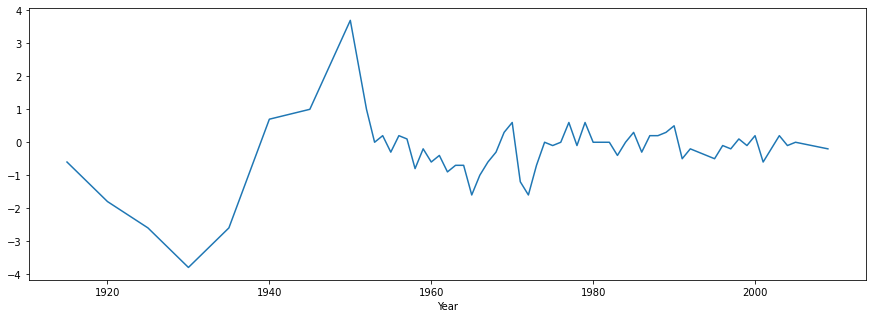

In [21]:
df['Difference'].plot()
plt.show()

### ACF Plotting

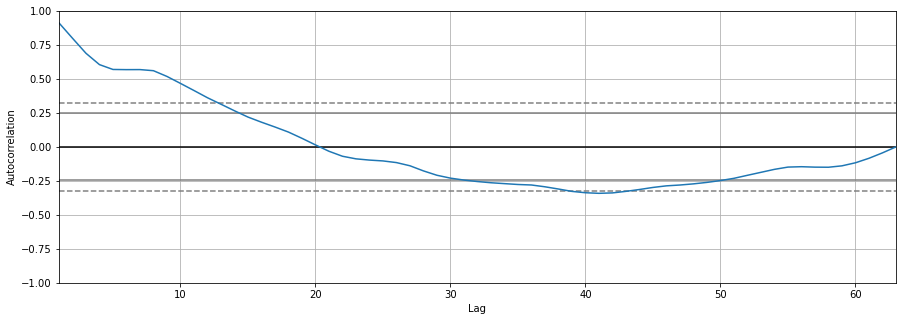

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Birth_Rate'])
plt.show()

### PACF Plotting

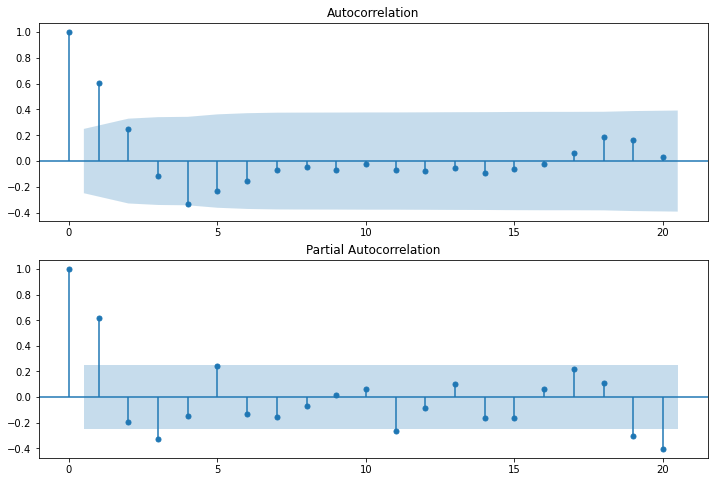

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Difference'].dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Difference'].dropna(),lags=20,ax=ax2)

### Model

In [24]:
model=ARIMA(df['Birth_Rate'],order=(2,0,1))
model_fit=model.fit()
model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Birth_Rate   No. Observations:                   63
Model:                     ARMA(2, 1)   Log Likelihood                 -74.707
Method:                       css-mle   S.D. of innovations              0.764
Date:                Tue, 31 May 2022   AIC                            159.415
Time:                        22:07:48   BIC                            170.130
Sample:                             0   HQIC                           163.629
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               19.6583      3.283      5.988      0.000      13.224      26.093
ar.L1.Birth_Rate     1.5592      0.138     11.262      0.000       1.288       1.831
ar.L2.Birth_Rate    -0.5873      0.142     -4.138      0.000      -0.865      -0.309
ma.L1.Birth_Rate     0.1197      0.151      0.795      0.427      -0.175       0.415
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0837           +0.0000j            1.0837            0.0000
AR.2            1.5713           +0.0000j            1.5713            0.0000
MA.1           -8.3564           +0.0000j            8.3564            0.5000
-----------------------------------------------------------------------------
"""

### Forecasting

<AxesSubplot:xlabel='Year'>

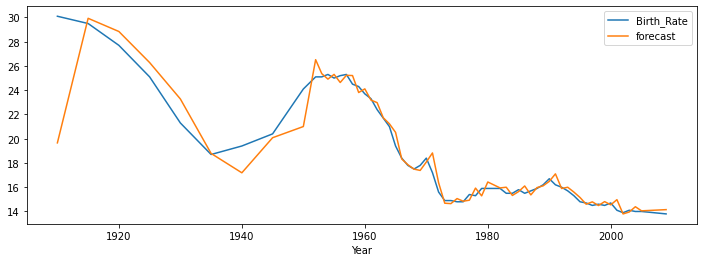

In [25]:
df['forecast'] = model_fit.predict()
df[['Birth_Rate','forecast']].plot(figsize=(12,4))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<AxesSubplot:xlabel='Year'>

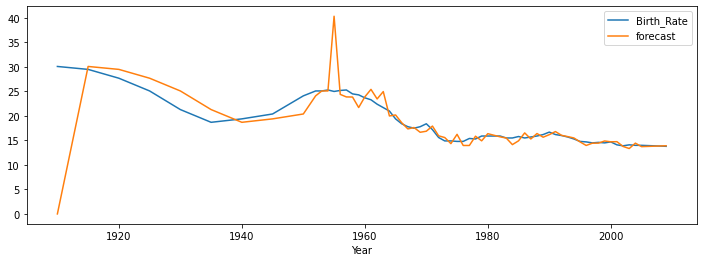

In [26]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Birth_Rate'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict()
df[['Birth_Rate','forecast']].plot(figsize=(12,4))